## Table of Contents

1. [Problem Statement](#section1)
2. [Data Loading and Description](#section2)
3. [Exploratory Data Analysis](#section3)
   - 3.1 [Explore the data](#section301)<br/>
   - 3.2 [Analysing the target variable](#section302)<br/>
   - 3.3 [Plotting out the skewness in the target variable](#section303)<br/>
   - 3.4 [Improving the skewness of the target variable](#section304)<br/>
4. [Feature Engineering](#section4)
   - 4.1 [Handling with Outliers](#section401)<br/>
   - 4.2 [Handling Null Values](#section402)<br/>
   - 4.3 [Extraction of Non - Numeric features](#section403)<br/>
   - 4.4 [Transforming features](#section404)<br/>
   - 4.5 [Sale Condition](#section405)<br/>
   - 4.6 [Dealing with missing values](#section406)<br/>
   - 4.7 [Building a Linear Model](#section407)<br/>
   - 4.8 [Partition the data](#section408)<br/>
   - 4.9 [Create a Linear Regression Model](#section409)<br/>
5. [Model Evaluation](#section5)<br/>

### 1. Problem Statement <a id="section1"></a>

The Problem statement of this project is to create a machine learning model which can __predict the sales price of the houses__
using the available data set

### 2. Data Loading and Description <a id="section2"></a>

The Given data set has __1460 observations and 81 Features__

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [3]:
df = pd.read_csv("https://github.com/Ram2437/Term-2/blob/master/Projects/house_data.csv?raw=True")
# pd.options.display.max_columns = None
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.<br/>
MSSubClass: The building class<br/>
MSZoning: The general zoning classification<br/>
LotFrontage: Linear feet of street connected to property<br/>
LotArea: Lot size in square feet<br/>
Street: Type of road access<br/>
Alley: Type of alley access<br/>
LotShape: General shape of property<br/>
LandContour: Flatness of the property<br/>
Utilities: Type of utilities available<br/>
LotConfig: Lot configuration<br/>
LandSlope: Slope of property<br/>
Neighborhood: Physical locations within Ames city limits<br/>
Condition1: Proximity to main road or railroad<br/>
Condition2: Proximity to main road or railroad (if a second is present)<br/>
BldgType: Type of dwelling<br/>
HouseStyle: Style of dwelling<br/>
OverallQual: Overall material and finish quality<br/>
OverallCond: Overall condition rating<br/>
YearBuilt: Original construction date<br/>
YearRemodAdd: Remodel date<br/>
RoofStyle: Type of roof<br/>
RoofMatl: Roof material<br/>
Exterior1st: Exterior covering on house<br/>
Exterior2nd: Exterior covering on house (if more than one material)<br/>
MasVnrType: Masonry veneer type<br/>
MasVnrArea: Masonry veneer area in square feet<br/>
ExterQual: Exterior material quality<br/>
ExterCond: Present condition of the material on the exterior<br/>
Foundation: Type of foundation<br/>
BsmtQual: Height of the basement<br/>
BsmtCond: General condition of the basement<br/>
BsmtExposure: Walkout or garden level basement walls<br/>
BsmtFinType1: Quality of basement finished area<br/>
BsmtFinSF1: Type 1 finished square feet<br/>
BsmtFinType2: Quality of second finished area (if present)<br/>
BsmtFinSF2: Type 2 finished square feet<br/>
BsmtUnfSF: Unfinished square feet of basement area<br/>
TotalBsmtSF: Total square feet of basement area<br/>
Heating: Type of heating<br/>
HeatingQC: Heating quality and condition<br/>
CentralAir: Central air conditioning<br/>
Electrical: Electrical system<br/>
1stFlrSF: First Floor square feet<br/>
2ndFlrSF: Second floor square feet<br/>
LowQualFinSF: Low quality finished square feet (all floors)<br/>
GrLivArea: Above grade (ground) living area square feet<br/>
BsmtFullBath: Basement full bathrooms<br/>
BsmtHalfBath: Basement half bathrooms<br/>
FullBath: Full bathrooms above grade<br/>
HalfBath: Half baths above grade<br/>
Bedroom: Number of bedrooms above basement level<br/>
Kitchen: Number of kitchens<br/>
KitchenQual: Kitchen quality<br/>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br/>
Functional: Home functionality rating<br/>
Fireplaces: Number of fireplaces<br/>
FireplaceQu: Fireplace quality<br/>
GarageType: Garage location<br/>
GarageYrBlt: Year garage was built<br/>
GarageFinish: Interior finish of the garage<br/>
GarageCars: Size of garage in car capacity<br/>
GarageArea: Size of garage in square feet<br/>
GarageQual: Garage quality<br/>
GarageCond: Garage condition<br/>
PavedDrive: Paved driveway<br/>
WoodDeckSF: Wood deck area in square feet<br/>
OpenPorchSF: Open porch area in square feet<br/>
EnclosedPorch: Enclosed porch area in square feet<br/>
3SsnPorch: Three season porch area in square feet<br/>
ScreenPorch: Screen porch area in square feet<br/>
PoolArea: Pool area in square feet<br/>
PoolQC: Pool quality<br/>
Fence: Fence quality<br/>
MiscFeature: Miscellaneous feature not covered in other categories<br/>
MiscVal: $Value of miscellaneous feature<br/>
MoSold: Month Sold<br/>
YrSold: Year Sold<br/>
SaleType: Type of sale<br/>
SaleCondition: Condition of sale<br/>

- Features: 
   - These above __80 columns__ in the dataset except Selling price are the properties of each house
- Response:
  - The __selling price__ of a single house in dollars, which is our target variable which we are going to predict

In [4]:
# creation of test and train data from the house data df
Train = df
Test = df.iloc[:,:-1] # I have excluded the SalePrice data as it is the value that needs to be predicted.

In [5]:
Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
print("Train data shape",Train.shape)

Train data shape (1460, 81)


In [7]:
print("Test data shape",Test.shape)

Test data shape (1460, 80)


As we can see, that the Test data has only 79 columns whereas the Train data has 80. This is due to the fact that the __test data do not include the final SalePrice information__

 ### 3. Exploratory Data Analysis<a id="section3"></a>

 ### 3.1 Explore the data <a id="section301"></a> 

The value i am trying to predict is often called the target variable. Here it is __"SalePrice"__

In [8]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 ### 3.2 Analysing the target variable <a id="section302"></a> 

To get more information about the target variable like count, mean, standard deviation, etc we use __.describe()__ method

In [9]:
Train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 ### 3.3 Plotting out the skewness in the target variable <a id="section303"></a> 

Next i will check the skewness of the data which is a measure of the shape of the distribution of the values

skew is : 1.8828757597682129


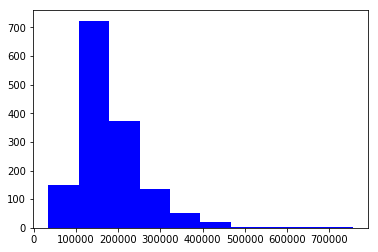

In [10]:
print("skew is :" ,Train.SalePrice.skew())
plt.hist(Train.SalePrice, color='blue')
plt.show()

 Here we can see that the distribution has a __long tail on the right,and is positively skewed__

 ### 3.4 Improving the skewness of the target variable <a id="section304"></a> 

When performing regression, sometimes it makes sense to log-transform the target variable, one reason for this is to improve the linearity of the data

- Importantly, the prediction generated by the final model will also be log-transformed, so we will need to convert these predictions back to the original form later.
- __np.log() will transform the variable__
- __np.exp() will reverse the transformation__


 Skew is :  0.12133506220520406


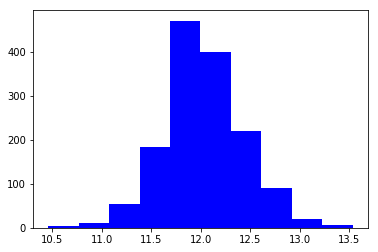

In [11]:
target = np.log(Train.SalePrice)
print("\n Skew is : ", target.skew())
plt.hist(target, color='blue')
plt.show()

A value close to 0 means we have __improved the skewness of the data__ by using __log() method__, Now we can see there is a __normal distribution__

## 4. Feature Engineering <a id="section4"></a> 

Feature Engineering is the process of making features of the data suitable for use in machine learning and modeling

__Dataframe.corr()__ method displays the __relationship between the features__, Then i can examine the relationship between the features and the target

In [12]:
# Finding the relationship between the columns

numeric_features = Train.select_dtypes(include=[np.number])
corr = numeric_features.corr()

print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


  - The __first five features are positively corelated__ with SalePrice, while the __last five are negatively corelated__

### 4.1 Handling with Outliers <a id="section401"></a> 

Let us visualise the relationship between the __"Saleprice" and the "GarageArea"__ by plotting a scatter plot

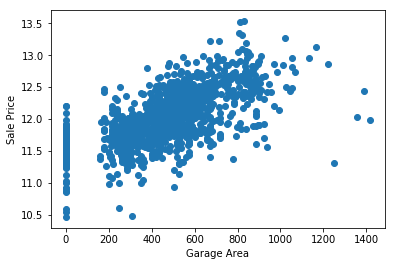

In [13]:
plt.scatter(x=Train['GarageArea'], y = target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

As you can see, 

  - There are many homes with garage area " 0 " indicating that they don't have garage. 
  - There are few outliers as well, outliers can affect the regression model by pulling the estimated regression line further away from the population regression line. so, i have removed the observations from the data

In [14]:
# Create a new dataframe with some outliers removed

Train = Train [Train['GarageArea'] < 1200]

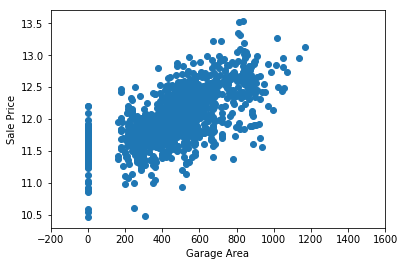

In [15]:
# Display the previous graph again without outliers

plt.scatter(x=Train['GarageArea'], y = np.log(Train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Now we can see that the __outliers are removed__

### 4.2 Handling Null Values <a id="section401"></a> 

I will create a new dataframe to view the top __null columns__ by using the method __isnull().sum()__ which returns the total count of null values in each column.

In [16]:
nulls = pd.DataFrame(Train.isnull().sum().sort_values(ascending=False)[:20])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)
# df_numerics.columns[df_numerics.isnull().any()]

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0


### 4.3 Extraction of Non - Numeric features <a id="section403"></a> 

In [17]:
categoricals = Train.select_dtypes(exclude=[np.number])
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1455         1455       1455  ...       1374         1374   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1378          225       1257  ...        867          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1374       1374       1455      6    281          53     1455   
unique          5          5          3      3      4           4        9   
top            TA         TA      

  - __count__ is total number of non-null observations
  - __unique__ counts the number of unique values
  - __top__ is the most commonly occuring value
  - __freq__ is the frquency of the top value

### 4.4 Transforming features <a id="section404"></a> 

For many of these features we might want to use the concept of one hot encoding to make use of the information

__One-hot encoding__ is a technique which will transform the categorical data into numbers so that model can understand whether or not a particular observation falls into one category or other 

__" When transforming features it is important that, any transformation that is applied to the training data before fitting the model must be applied to the test data "__

Consider the street data, which indicates whether there is Gravel or Paved road access to the property

In [18]:
print("Original: \n")
print(Train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



So, here we see that the street data has __Paved and Gravel unique values__, which __describe the type of road access to the property__. This model __needs numeric data__ so i have used __one-hot encoding__ to transform the data into a binomial column.

- Create a new column called __Street_Enc, pd.get_dummies()__ method will be used for this

In [21]:
pd.set_option('mode.chained_assignment', None)
Train['Street_Enc'] = pd.get_dummies(Train.Street, drop_first=True)
Test['Street_Enc'] = pd.get_dummies(Test.Street, drop_first=True)

In [22]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Enc
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


In [23]:
print("Encoded: \n")
print(Train.Street_Enc.value_counts(),"\n")

Encoded: 

1    1450
0       5
Name: Street_Enc, dtype: int64 



Pave and Grvl are now converted to numerical values 1 & 0 

### 4.5 Sale condition <a id="section405"></a> 

look at sale condition by constructing and plotting a pivot table

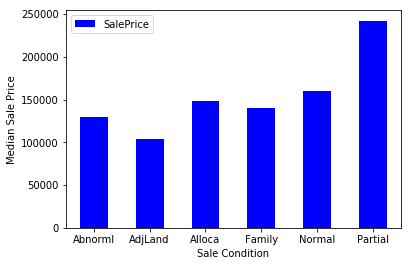

In [24]:
condition_pivot = Train.pivot_table(index = 'SaleCondition', values = 'SalePrice', aggfunc = np.median)
condition_pivot.plot(kind ='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Note that the __Partial__ has a significantly __higher median sale price__ than the others. We will encode this as a new feature. 
- We will select all the houses whose sale condition is "Partial" and assign the value 1, otherwise assign 0

In [25]:
def encode(x): return 1 if x=='Partial' else 0
Train['enc_condition'] = Train.SaleCondition.apply(encode)
Test['enc_condition'] = Test.SaleCondition.apply(encode)

Explore this new feature as a plot

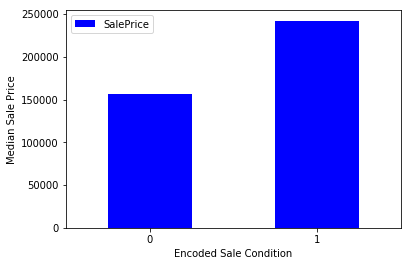

In [26]:
condition_pivot = Train.pivot_table(index = 'enc_condition', values = 'SalePrice', aggfunc = np.median)
condition_pivot.plot(kind ='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### 4.6 Dealing with missing values <a id="section406"></a> 

I will fill the missing values with the average value and then assign the result to data.This is a method called __"Interpolation"__

- By using __DataFrame.interpolate()__ method we can make this simple

In [27]:
data = Train.select_dtypes(include=[np.number]).interpolate().dropna()

In [28]:
print(sum(data.isnull().sum() != 0))

0


### 4.7 Building a Linear Model <a id="section407"></a> 

Seperate the features and the target variable for modelling.

- Assign the features to X
- Assign the target variable to y

I use __np.log() to transform the y variable__ for the model

In [29]:
y = np.log(Train.SalePrice)

__I won't include Saleprice__ since it is a target variable and __id__ is just and index with no relationship with saleprice 
data.drop([features],axis=1) tells pandas which column to be excluded

In [30]:
X = data.drop(['SalePrice'],axis=1)

### 4.8 Partition the data <a id="section408"></a> 

Partitioning the data in this way allows us to evaluate how our model might perform on that data that it has never seen before. If we train the model in all of the test, it will be difficult to say if overfitting has taken place

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=10)

### 4.9. Create a Linear Regression Model <a id="section409"></a> 

- Firstly, let us initiate the model
- Model Fitting (This is used to find the relationship between the predicted and the target variables so that we can make accurate predictions on new data)

In [32]:
LinReg = linear_model.LinearRegression()

In [33]:
# Fitted the model using X_train and y_train
model = LinReg.fit(X_train,y_train)

## 5. Model Evaluation <a id="section5"></a> 

### 5.1 Calculating $ R^2 $ value <a id="section501"></a> 

The r-squared value is a measure of how close the data are to the fitted regression line.
- The __r-square value ranges from 0 to 1__, 1 meaning all of the variance in the target is explained by the data
- In general, __Higher the r-square better the fit__
- __model.score() method__ returns the r-squared value by default

In [34]:
print("R*2 is : \n",model.score(X_test,y_test))

R*2 is : 
 0.8925440727302635


It is approximately 89% in my target variable

### 5.2 RMSE - (Root Mean Squared Error) <a id="section502"></a> 

Next i am going to consider the RMSE - (Root Mean Squared Error)

- RMSE measures the distance between the predicted and the actual

In [35]:
Predictions = model.predict(X_test)

In [36]:
print("RMSE is: \n", mean_squared_error(y_test,Predictions))

RMSE is: 
 0.018943028313011243


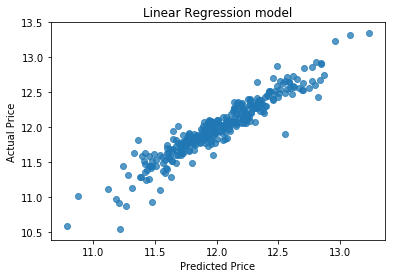

In [37]:
plt.scatter(Predictions, y = y_test, alpha=.75)
plt.title("Linear Regression model")
plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')
plt.show()

If my predicted values were identical to the actual values, this graph would be the straight line __y=x__, Because each predicted value x would be equal to each actual value x 